In [131]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error

In [132]:
data = pd.read_csv('housing.csv', header=None, delimiter=r'\s+')
X = data[range(13)]
y = data[13]

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [134]:
def plot_learning_curve(model, model_name, target=False):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y,
        scoring='neg_mean_squared_error',
        train_sizes=np.linspace(0.1, 1, 10)
    )

    train_scores_mean = -train_scores.mean(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean)
    plt.plot(train_sizes, test_scores_mean)

    if target:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        plt.plot(train_sizes, [mse] * len(train_sizes), color='red', linestyle='--')


    plt.title(model_name)
    plt.xlabel("Training set size")
    plt.ylabel("MSE")
    plt.grid(True)
    plt.show()

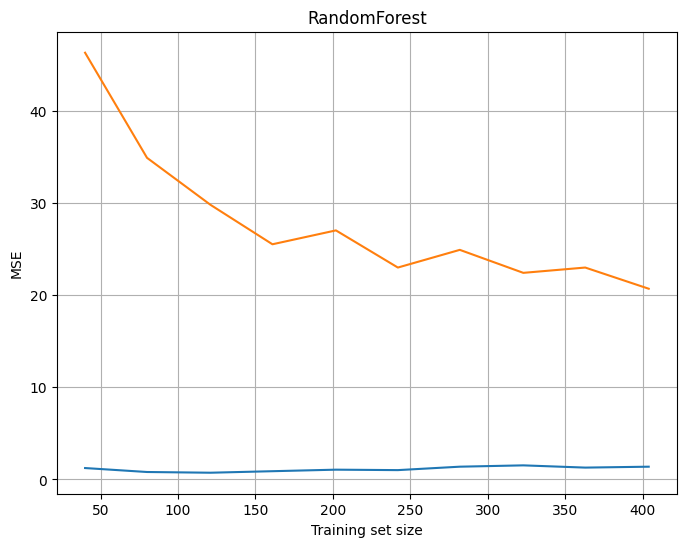

In [135]:
plot_learning_curve(RandomForestRegressor(), "RandomForest")

Видим, случайный лес переобучается на тренировочной выборке. Предположим, что целевое значение метрики где-то 22

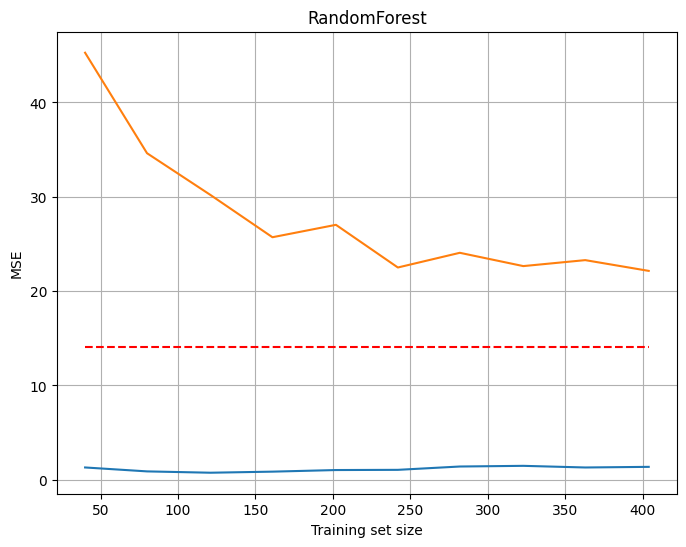

In [136]:
plot_learning_curve(RandomForestRegressor(),"RandomForest", True)

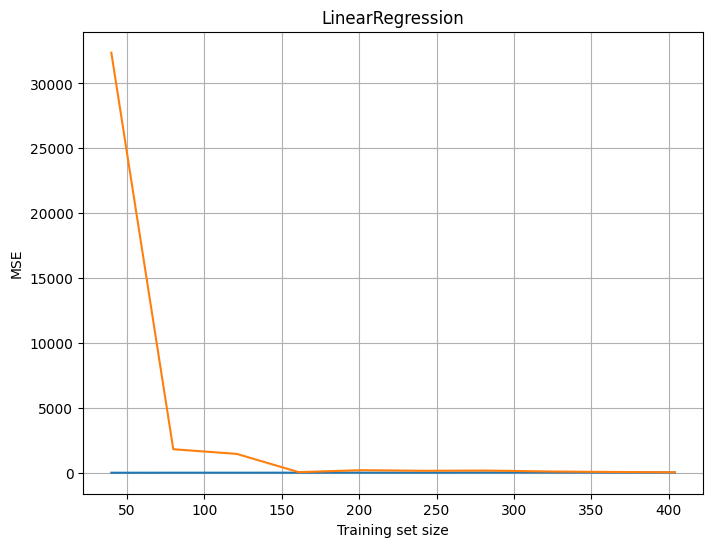

In [137]:
plot_learning_curve(LinearRegression(), "LinearRegression")

Точность модели низкая, ее можно считать недообученной. Целевое значение метрики очень маленькое.

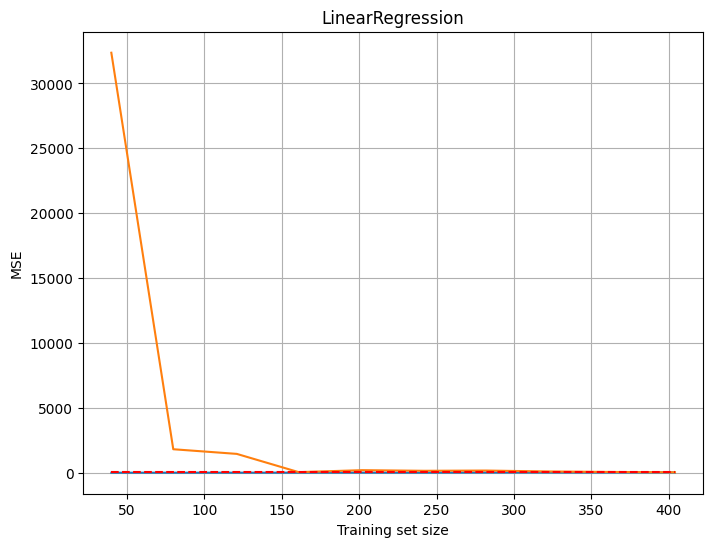

In [138]:
plot_learning_curve(LinearRegression(), "LinearRegression", True)

Таким образом, RandomForest показывает более стабильные и меньшие значения MSE, поэтому он подходит для нашего датасета лучше.

In [139]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [140]:
coef_dict = {}
def train_and_score(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    coef_dict[model_name] = model.coef_

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(model_name)
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"R2: {r2}")

In [141]:
train_and_score(Lasso(), "Lasso")

Lasso
MSE: 32.34503899856862
MAE: 3.8297992589493255
R2: 0.6115433359595555


In [142]:
train_and_score(Ridge(), "Ridge")

Ridge
MSE: 27.762224592166508
MAE: 3.602077378024109
R2: 0.6665819091486691


In [143]:
train_and_score(LinearRegression(), "LinearRegression")

LinearRegression
MSE: 27.19596576688351
MAE: 3.609904060381827
R2: 0.673382550640016


Lasso-регуляризация показала лучшие результаты. Ridge и линейная регрессия показали примерно одинаковую эффективность.

In [145]:
df = pd.DataFrame.from_dict(coef_dict)
df

,Lasso,Ridge,LinearRegression
0,-0.065862,-0.118309,-0.121310
1,0.048329,0.046126,0.044466
2,-0.000000,-0.020863,0.011342
3,0.000000,2.458686,2.511246
4,-0.000000,-8.259585,-16.231253
5,0.868985,3.897485,3.859068
6,0.012180,-0.017914,-0.009985
7,-0.751094,-1.397372,-1.500270
8,0.200074,0.218432,0.242143
9,-0.013951,-0.011634,-0.011072


Видим, что некоторые коэффициенты в Lasso-регуляризации равны 0 => соответствующие этим коэффициентам признаки необязательны для решения задачи.

In [146]:
X.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


Некоторые признаки сильно коррелируют между собой и вес одного из таких признаков, как правило, большой, а другой маленький.